In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import sklearn.metrics
import scipy.stats
import networkx as nx
import pickle
import copy
import fortuna
sns.set()
sns.set_style("white")

from perses.analysis import load_simulations,cycles

import itertools
import os

#######################
# THINGS FOR STYLE
#######################
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

rainbow_cmap = plt.cm.get_cmap('gist_rainbow')    
green_cmap = plt.cm.get_cmap('Greens')
    
base_directory = os.getcwd()

In [2]:
class Thrombin(object):
    name = 'thrombin'
    thrombin = ['1b','1d','3b','1a','6a','7a','3a','5','6b','6e','1c']
    base_id = 1
    name_to_index = {}
    index_to_name = {}
    for i,lig in enumerate(thrombin):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('1d','6e'),('1d','5'),('1b','3b'),('6a','1b'),('1b','1c'),('1d','1c'),('1b','1a'),('1a','5'),('3a','1d'),('6a','6b'),('1d','7a'),('1b','7a'),('3a','1b'),('1d','1a'),('1a','3b'),('6e','6b')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))

    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Mcl1(object):
    name = 'mcl1'
    mcl1 = ['26','48','33','46','35','31','52','68','32','38','51','50','28','66','39','37','30','54','44','23','29','40','62','61','49','64','41','65','58','63','27','47','57','56','53','36','60','45','42','67','34','43']
    name_to_index = {}
    index_to_name = {}
    base_id = 14
    for i,lig in enumerate(mcl1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('50','60'), ('56','35'), ('65','60'), ('26','57'), ('58','60'), ('62','45'), ('60','36'), ('30','27'), ('33','27'), ('43','27'), ('67','58'), ('67','32'), ('30','40'), ('38','60'), ('41','35'), ('54','23'), ('56','60'), ('66','42'), ('29','40'), ('26','44'), ('49','35'), ('29','35'), ('42','51'), ('39','32'), ('35','37'), ('28','35'), ('35','53'), ('67','63'), ('27','45'), ('41','32'), ('67','53'), ('35','33'), ('27','46'), ('66','23'), ('67','61'), ('57','23'), ('30','35'), ('61','60'), ('67','31'), ('32','46'), ('35','60'), ('31','35'), ('62','26'), ('35','36'), ('26','64'), ('38','35'), ('35','34'), ('29','27'), ('48','27'), ('68','45'), ('63','60'), ('54','42'), ('44','23'), ('28','27'), ('67','27'), ('52','60'), ('27','23'), ('49','67'), ('28','47'), ('67','52'), ('30','48'), ('67','35'), ('32','34'), ('65','67'), ('67','50'), ('35','39'), ('43','47'), ('67','37'), ('42','64'), ('51','45'), ('68','23')]
    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None

class Bace(object):
    name = 'bace'
    bace = ['CAT-13f','CAT-13d','CAT-4c','CAT-13b','CAT-4l','CAT-13m','CAT-4k','CAT-13n','CAT-13o','CAT-13a','CAT-13k','CAT-17a','CAT-17f','CAT-13i','CAT-17d','CAT-13c','CAT-17c','CAT-24','CAT-17i','CAT-13g','CAT-4j','CAT-17b','CAT-4p','CAT-17h','CAT-4b','CAT-17g','CAT-4d','CAT-4m','CAT-13e','CAT-4n','CAT-4o','CAT-4a','CAT-13j','CAT-13h','CAT-4i','CAT-17e']
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    for i,lig in enumerate(bace):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('CAT-13b','CAT-17g'), ('CAT-13a','CAT-17g'), ('CAT-13e','CAT-17g'), ('CAT-4m','CAT-4c'), ('CAT-13k','CAT-4d'), ('CAT-24','CAT-17e'), ('CAT-13g','CAT-17g'), ('CAT-13d','CAT-13h'), ('CAT-13a','CAT-17i'), ('CAT-4m','CAT-13j'), ('CAT-13a','CAT-13m'), ('CAT-4l','CAT-13k'), ('CAT-13o','CAT-17i'), ('CAT-4c','CAT-4o'), ('CAT-4j','CAT-4o'), ('CAT-4i','CAT-13m'), ('CAT-24','CAT-17i'), ('CAT-13j','CAT-4o'), ('CAT-4n','CAT-13k'), ('CAT-4o','CAT-4b'), ('CAT-17i','CAT-13f'), ('CAT-17c','CAT-17e'), ('CAT-13k','CAT-4b'), ('CAT-4m','CAT-4j'), ('CAT-13n','CAT-13k'), ('CAT-13d','CAT-17h'), ('CAT-17b','CAT-13d'), ('CAT-4m','CAT-4n'), ('CAT-4m','CAT-13k'), ('CAT-13c','CAT-17i'), ('CAT-4a','CAT-4o'), ('CAT-13h','CAT-17i'), ('CAT-4o','CAT-4d'), ('CAT-17g','CAT-17c'), ('CAT-4a','CAT-13k'), ('CAT-13d','CAT-17d'), ('CAT-17g','CAT-17f'), ('CAT-13e','CAT-17i'), ('CAT-13d','CAT-13b'), ('CAT-17g','CAT-13i'), ('CAT-4m','CAT-13m'), ('CAT-17g','CAT-13c'), ('CAT-17i','CAT-17a'), ('CAT-13d','CAT-13f'), ('CAT-17f','CAT-17e'), ('CAT-13d','CAT-17a'), ('CAT-17g','CAT-17d'), ('CAT-13n','CAT-13a'), ('CAT-13o','CAT-17h'), ('CAT-17b','CAT-17e'), ('CAT-4k','CAT-4o'), ('CAT-4m','CAT-4l'), ('CAT-4m','CAT-4k'), ('CAT-13n','CAT-4i'), ('CAT-13g','CAT-17i'), ('CAT-4p','CAT-13k'), ('CAT-4m','CAT-4p'), ('CAT-13d','CAT-13i')]    
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None        

class Jnk1(object):
    name = 'jnk1'
    jnk1 = ['18629-1','18634-1','18628-1','18660-1','18624-1','18633-1','18635-1','17124-1','18625-1','18659-1','18637-1','18638-1','18652-1','18627-1','18658-1','18630-1','18639-1','18631-1','18632-1','18636-1','18626-1']
    name_to_index = {}
    index_to_name = {}
    base_id = 19
    for i,lig in enumerate(jnk1):
        name_to_index[lig] = i
        index_to_name[i] = lig
    name_pairs = [('17124-1','18634-1'), ('18626-1','18624-1'), ('18636-1','18625-1'), ('18632-1','18624-1'), ('18635-1','18625-1'), ('18626-1','18658-1'), ('18639-1','18658-1'), ('18626-1','18625-1'), ('18638-1','18658-1'), ('18628-1','18624-1'), ('18631-1','18660-1'), ('18638-1','18634-1'), ('18626-1','18632-1'), ('18626-1','18630-1'), ('18631-1','18624-1'), ('18629-1','18627-1'), ('18634-1','18637-1'), ('18626-1','18627-1'), ('18631-1','18652-1'), ('18637-1','18631-1'), ('18626-1','18634-1'), ('18633-1','18624-1'), ('17124-1','18631-1'), ('18627-1','18630-1'), ('18659-1','18634-1'), ('18636-1','18624-1'), ('18626-1','18628-1'), ('18626-1','18660-1'), ('18626-1','18659-1'), ('18639-1','18634-1'), ('18635-1','18624-1')]
    index_pairs = []
    for a,b in name_pairs:
        index_pairs.append((name_to_index[a],name_to_index[b]))
        
    def __init__(self):
        self.name = name
        self.name_to_index = name_to_index
        self.index_to_name = index_to_name
        self.name_pairs = name_pairs
        self.index_pairs = index_pairs
        self.color = None        
        
def check_missing_results(target,all_sims):
    still_to_run = copy.deepcopy(target.index_pairs)
    for sim in all_sims:
        lig_id_a = int(sim.ligA)
        lig_id_b = int(sim.ligB)
        still_to_run.remove((lig_id_a,lig_id_b))
    return still_to_run
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 thrombin 
There are 0 simulations left to run: []


/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/brucemah/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


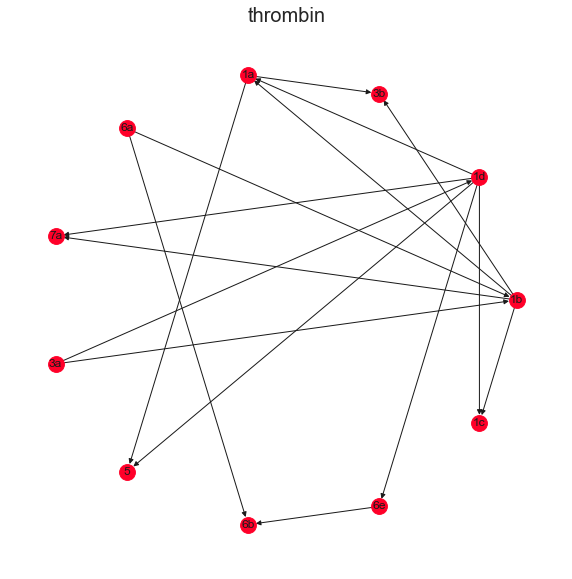

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Absolutes
1b, 0.42
1d, 0.00
3b, 1.77
1a, 1.52
6a, -1.14
7a, 1.08
3a, 1.21
5, 2.08
6b, -0.18
6e, -0.88
1c, 0.02

Relatives
1d,6e,-0.88
1d,5,2.08
1b,3b,1.35
6a,1b,1.56
1b,1c,-0.41
1d,1c,0.02
1b,1a,1.10
1a,5,0.56
3a,1d,-1.21
6a,6b,0.96
1d,7a,1.08
1b,7a,0.66
3a,1b,-0.79
1d,1a,1.52
1a,3b,0.25
6e,6b,0.70



 mcl1 
There are 1 simulations left to run: [(41, 31)]
lig16to21


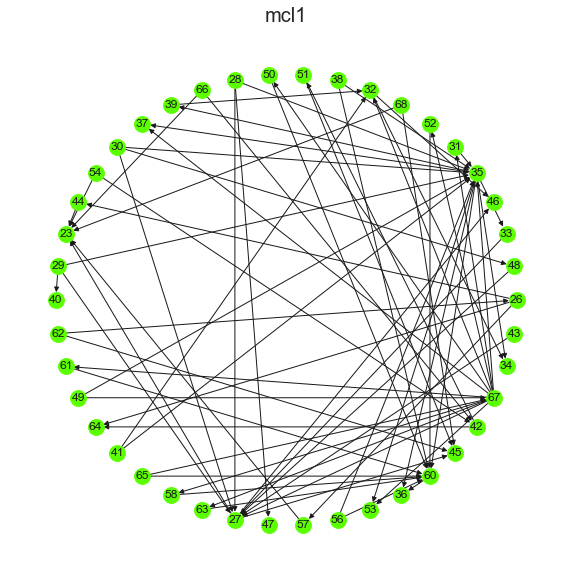

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 Not all simulations are done, following data isnt complete. 
Absolutes
26, -0.62
48, 4.64
33, -0.51
46, 0.33
35, -1.36
31, 0.45
52, -3.43
68, 0.30
32, 0.42
38, -3.05
51, -0.45
50, -3.18
28, 1.13
66, -1.96
39, 0.00
37, -3.32
30, 0.29
54, -2.18
44, -0.91
23, -0.50
29, 1.56
40, 0.56
62, -0.33
61, -3.36
49, -1.83
64, -2.09
41, -2.28
65, -5.15
58, -5.52
63, -5.52
27, 0.73
47, 0.32
57, -0.47
56, -2.93
53, -5.68
36, -1.15
60, -3.75
45, -1.98
42, 0.11
67, -4.12
34, -1.41
43, 0.46

Relatives
50,60,-0.57
56,35,1.57
65,60,1.40
26,57,0.15
58,60,1.77
62,45,-1.65
60,36,2.60
30,27,0.43
33,27,1.23
43,27,0.27
67,58,-1.40
67,32,4.54
30,40,0.27
38,60,-0.71
41,35,0.92
54,23,1.68
56,60,-0.83
66,42,2.07
29,40,-1.00
26,44,-0.29
49,35,0.47
29,35,-2.92
42,51,-0.57
39,32,0.42
35,37,-1.96
28,35,-2.49
35,53,-4.32
67,63,-1.40
27,45,-2.71
41,32,2.70
67,53,-1.56
35,33,0.85
27,46,-0.39
66,23,1.46
67,61,0.76
57,23,-0.03
30,35,-1.65
61,60,-0.39
67,31,4.57
32,46,-0.09
35,60,-2.39
31,35,-1.81
62,26,-0.28
35,36,0.21
26,6

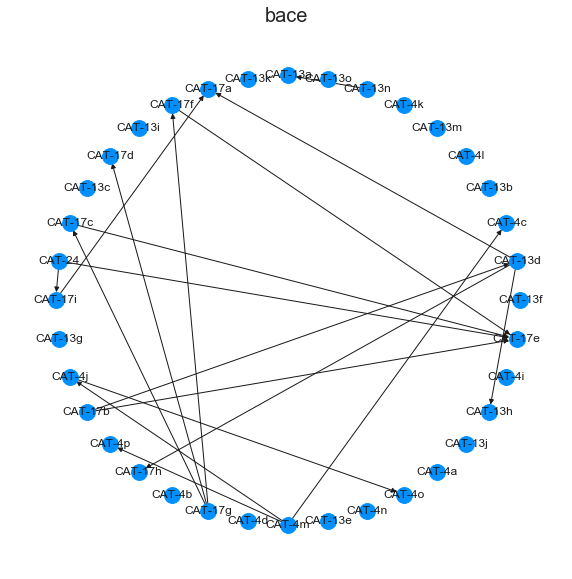

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


 Not all simulations are done, following data isnt complete. 
Absolutes
CAT-13f, 0.00
CAT-13d, -0.36
CAT-4c, 0.35
CAT-13b, -0.00
CAT-4l, -0.00
CAT-13m, 0.00
CAT-4k, 0.00
CAT-13n, 0.21
CAT-13o, 0.00
CAT-13a, -0.21
CAT-13k, 0.00
CAT-17a, -0.67
CAT-17f, -0.22
CAT-13i, 0.00
CAT-17d, 2.49
CAT-13c, -0.00
CAT-17c, -1.63
CAT-24, -1.82
CAT-17i, 0.46
CAT-13g, 0.00
CAT-4j, 1.12
CAT-17b, -0.97
CAT-4p, -1.72
CAT-17h, 0.44
CAT-4b, 0.00
CAT-17g, 0.86
CAT-4d, 0.00
CAT-4m, -0.59
CAT-13e, 0.00
CAT-4n, 0.00
CAT-4o, 0.84
CAT-4a, 0.00
CAT-13j, 0.00
CAT-13h, 1.52
CAT-4i, 0.00
CAT-17e, -0.09

Relatives
CAT-13b,CAT-17g,0.86
CAT-13a,CAT-17g,1.06
CAT-13e,CAT-17g,0.86
CAT-4m,CAT-4c,0.95
CAT-13k,CAT-4d,-0.00
CAT-24,CAT-17e,1.73
CAT-13g,CAT-17g,0.86
CAT-13d,CAT-13h,1.88
CAT-13a,CAT-17i,0.67
CAT-4m,CAT-13j,0.59
CAT-13a,CAT-13m,0.21
CAT-4l,CAT-13k,0.00
CAT-13o,CAT-17i,0.46
CAT-4c,CAT-4o,0.48
CAT-4j,CAT-4o,-0.28
CAT-4i,CAT-13m,0.00
CAT-24,CAT-17i,2.28
CAT-13j,CAT-4o,0.84
CAT-4n,CAT-13k,0.00
CAT-4o,CAT-4b,-0.84
CAT-17

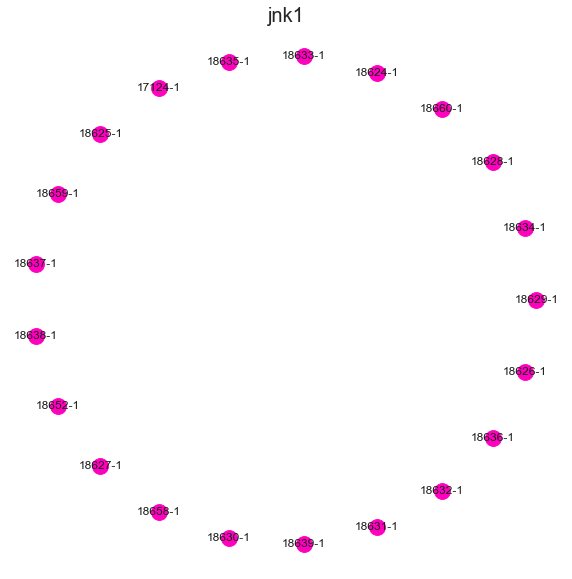

 Not all simulations are done, following data isnt complete. 
Absolutes
18629-1, 0.00
18634-1, 0.00
18628-1, 0.00
18660-1, 0.00
18624-1, 0.00
18633-1, 0.00
18635-1, 0.00
17124-1, 0.00
18625-1, 0.00
18659-1, 0.00
18637-1, 0.00
18638-1, 0.00
18652-1, 0.00
18627-1, 0.00
18658-1, 0.00
18630-1, 0.00
18639-1, 0.00
18631-1, 0.00
18632-1, 0.00
18636-1, 0.00
18626-1, 0.00

Relatives
17124-1,18634-1,0.00
18626-1,18624-1,0.00
18636-1,18625-1,0.00
18632-1,18624-1,0.00
18635-1,18625-1,0.00
18626-1,18658-1,0.00
18639-1,18658-1,0.00
18626-1,18625-1,0.00
18638-1,18658-1,0.00
18628-1,18624-1,0.00
18631-1,18660-1,0.00
18638-1,18634-1,0.00
18626-1,18632-1,0.00
18626-1,18630-1,0.00
18631-1,18624-1,0.00
18629-1,18627-1,0.00
18634-1,18637-1,0.00
18626-1,18627-1,0.00
18631-1,18652-1,0.00
18637-1,18631-1,0.00
18626-1,18634-1,0.00
18633-1,18624-1,0.00
17124-1,18631-1,0.00
18627-1,18630-1,0.00
18659-1,18634-1,0.00
18636-1,18624-1,0.00
18626-1,18628-1,0.00
18626-1,18660-1,0.00
18626-1,18659-1,0.00
18639-1,18634-

In [3]:
targets = {'thrombin':Thrombin, 'mcl1':Mcl1,'bace':Bace,'jnk1':Jnk1}

for i, (_, target) in zip(np.linspace(0.,1.,len(targets)), targets.items()):
    target.color = rainbow_cmap(i)


for (_, target) in targets.items():
    os.chdir(f'{base_directory}/{target.name}/results/')
    print(f'{color.BOLD} {target.name} {color.END}')
    all_sims = []

    all_files = os.listdir()

    for file in [x for x in all_files if x[-3:] == '.pi']:
        x = pickle.load(open(file,'rb'))
        all_sims.append(x)

    missing = check_missing_results(target,all_sims)
    print(f'There are {len(missing)} simulations left to run: {missing}')


    import networkx as nx
    G = nx.DiGraph()

    for item in target.index_to_name:
        G.add_node(item,name=target.index_to_name[item])

    for sim in all_sims:
        a = int(sim.ligA)
        b = int(sim.ligB)
        try:
            efficiency = np.log10(((sim.comddg**2 + sim.solddg**2)**0.5 )** -1)
            G.add_edge(a,b,f_ij=sim.bindingdg/1.69,df_ij=sim.bindingddg/1.69,efficiency=efficiency)
        except TypeError:
            print(sim.directory)
    plt.figure(figsize=(10,10))
    plt.title(target.name,fontsize=20)
    nx.draw_circular(G,labels=target.index_to_name,node_color=target.color, node_size=250, cmap=plt.cm.gist_rainbow)
    plt.show()

    f_i, C = fortuna.optimize.mle(G)
    f_i = [f_i[target.base_id]-x for x in f_i]

    if len(check_missing_results(target,all_sims)) != 0:
        print(f'{color.BOLD} Not all simulations are done, following data isnt complete. {color.END}')
    print('Absolutes')
    for node in G.nodes(data=True):
        G.node[node[0]]['f_i'] = f_i[node[0]]
        G.node[node[0]]['df_i'] = C[node[0],node[0]]
        print(f"{node[1]['name']}, {node[1]['f_i']:.2f}")

    print()
    print('Relatives')    
    for a,b in target.index_pairs:
        relative = f_i[b] - f_i[a]
        print(f'{target.index_to_name[a]},{target.index_to_name[b]},{relative:.2f}')
    target.all_sims = all_sims
    print()
    print()
    print()

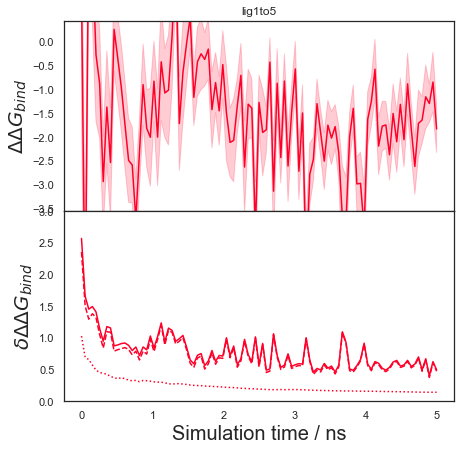

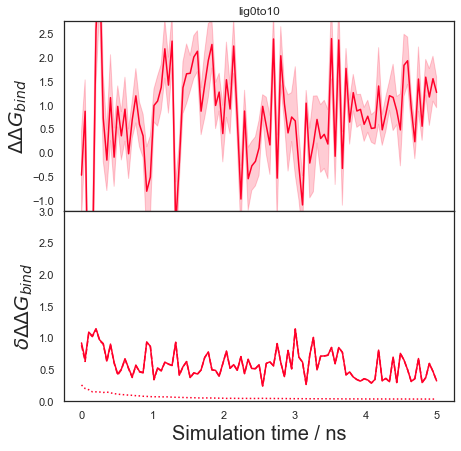

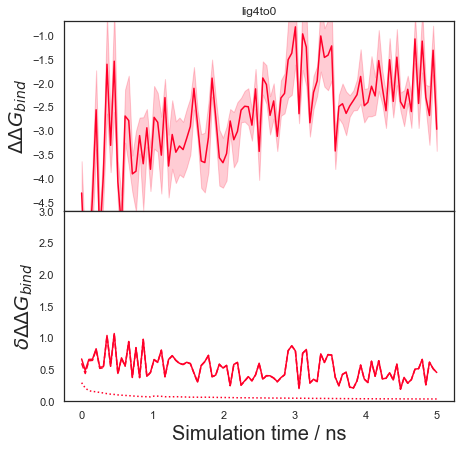

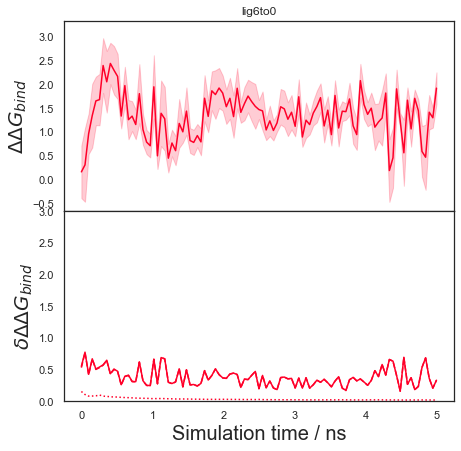

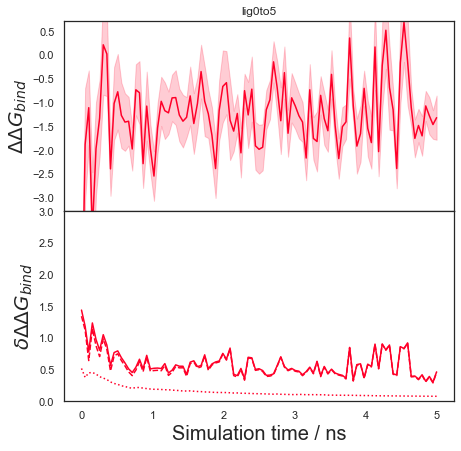

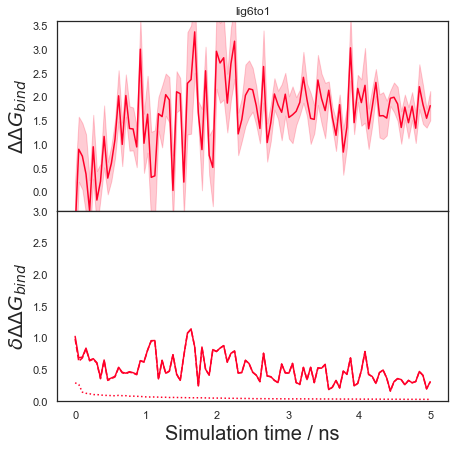

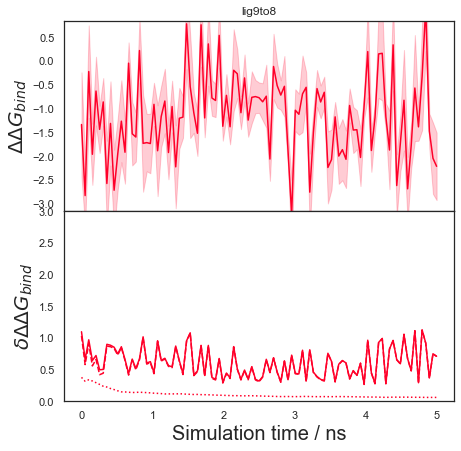

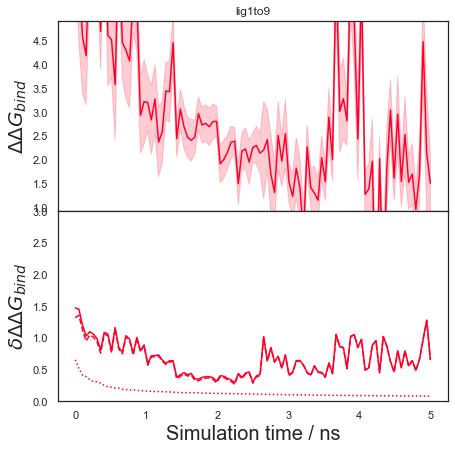

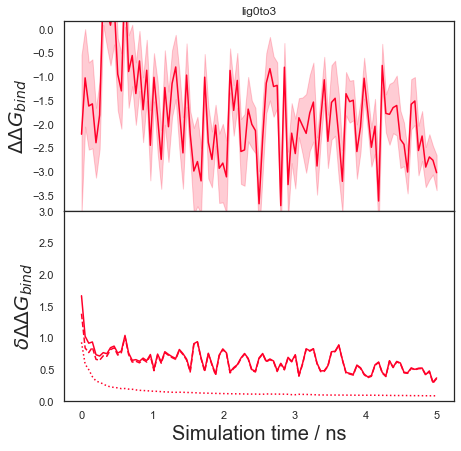

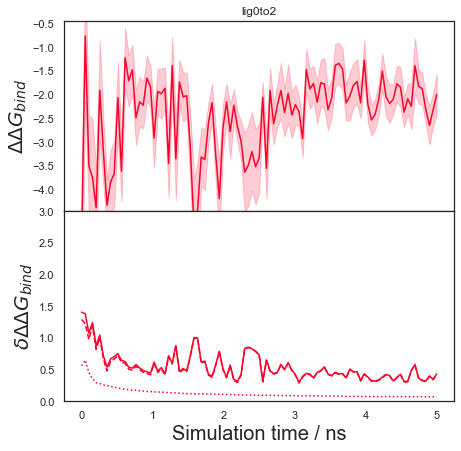

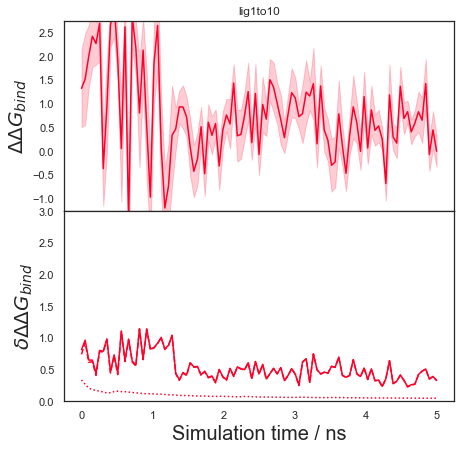

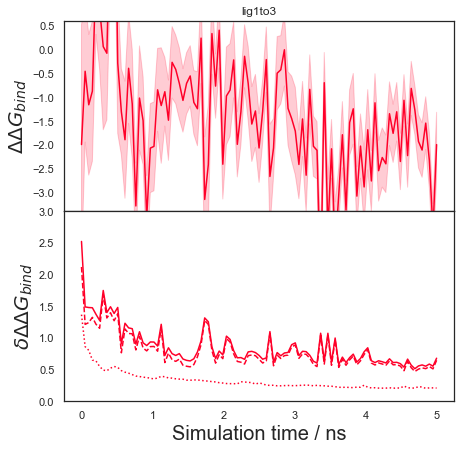

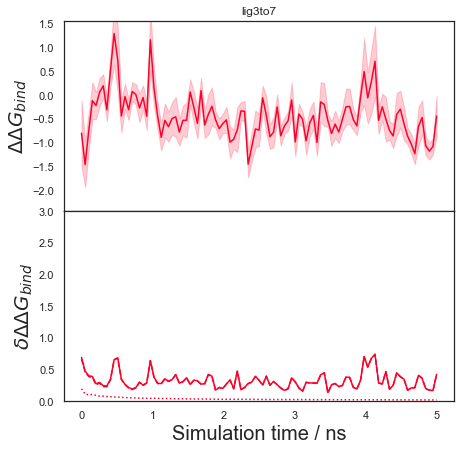

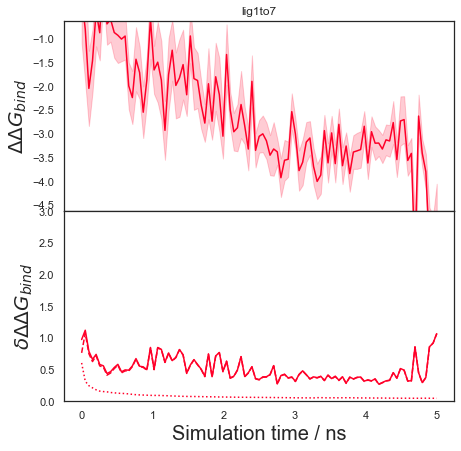

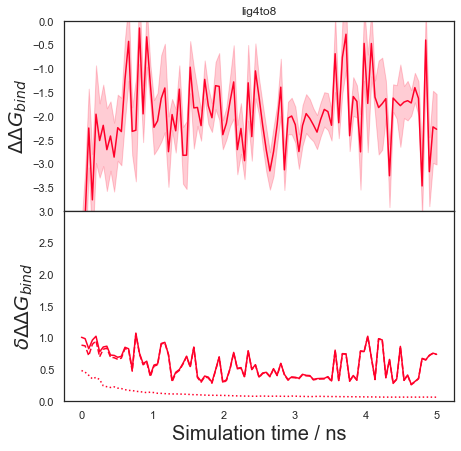

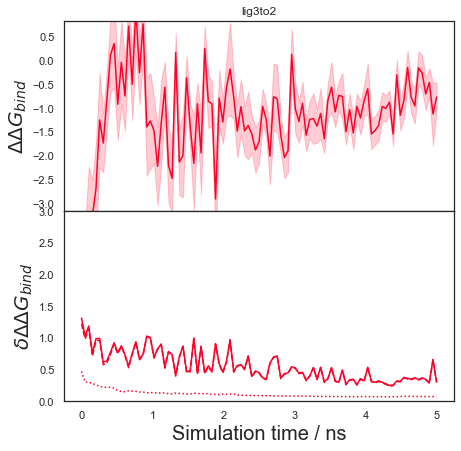

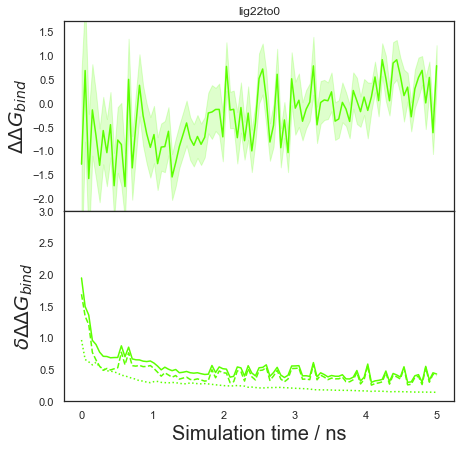

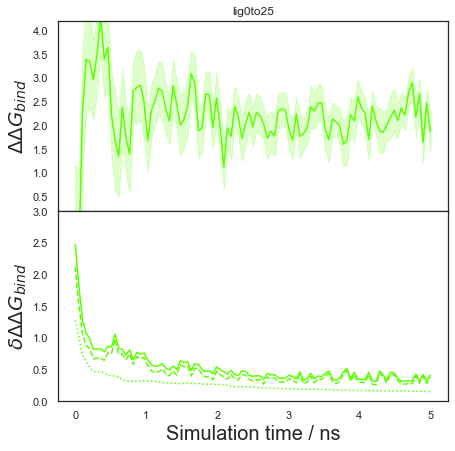

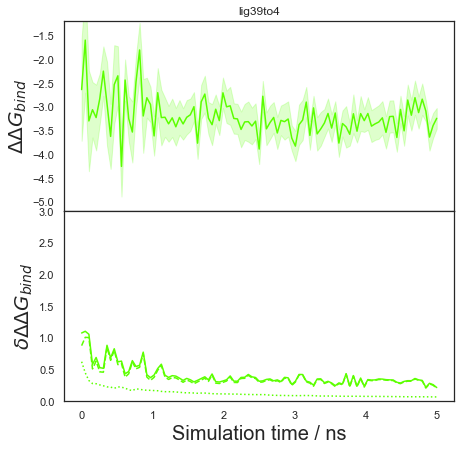

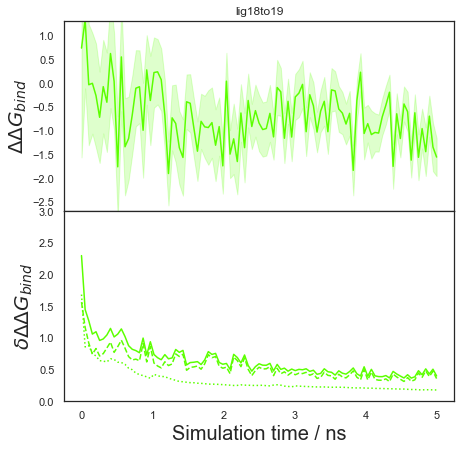

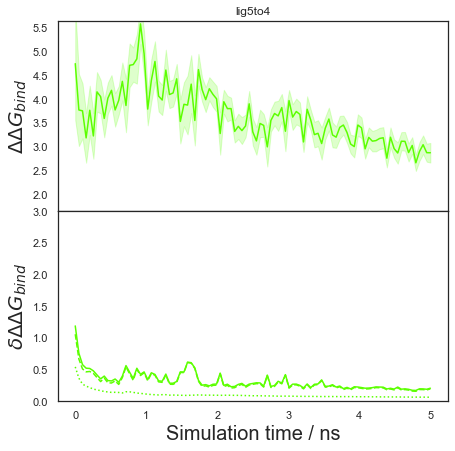

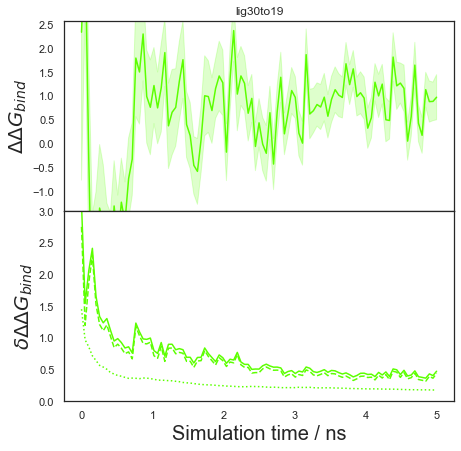

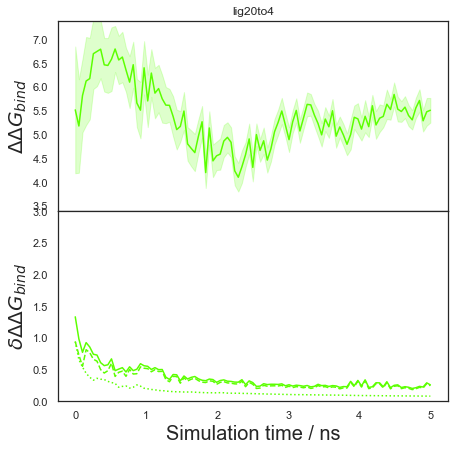

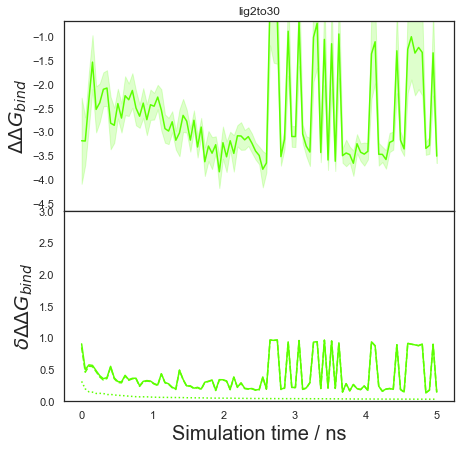

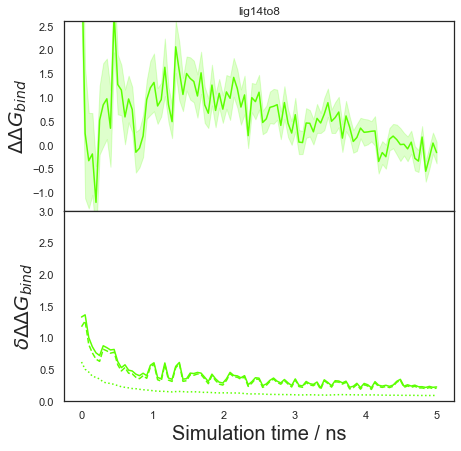

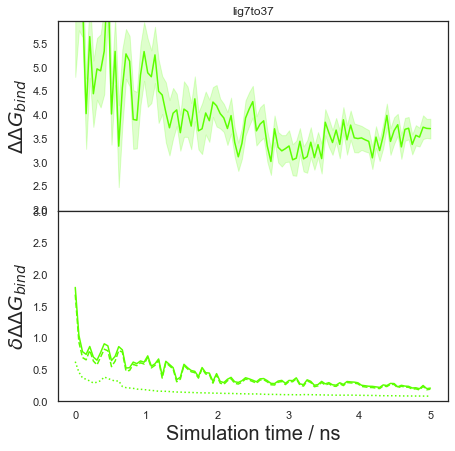

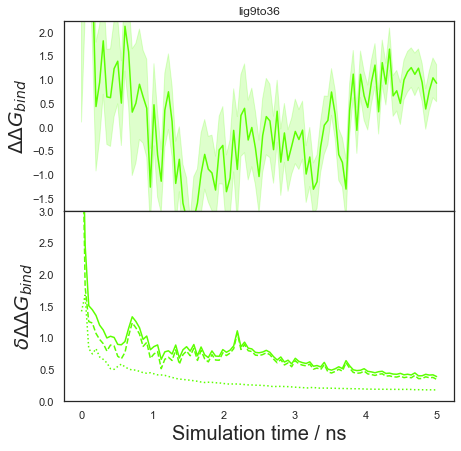

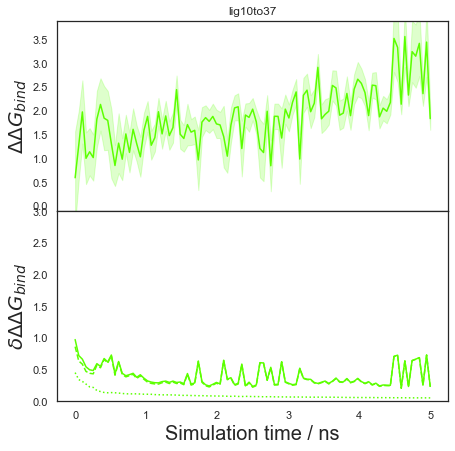

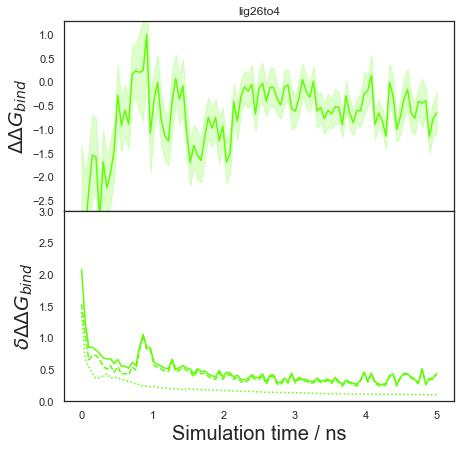

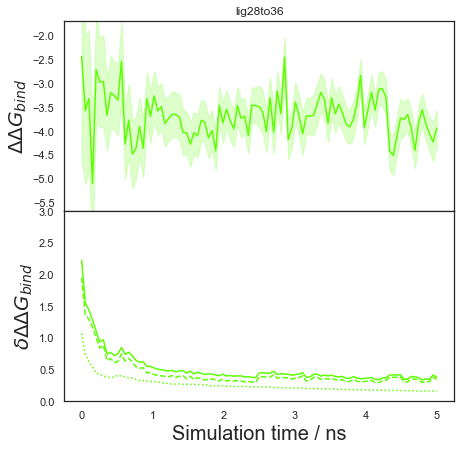

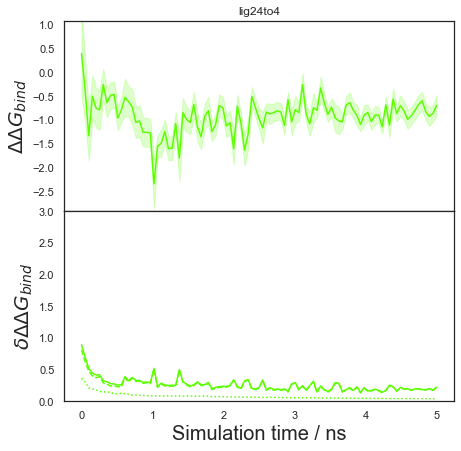

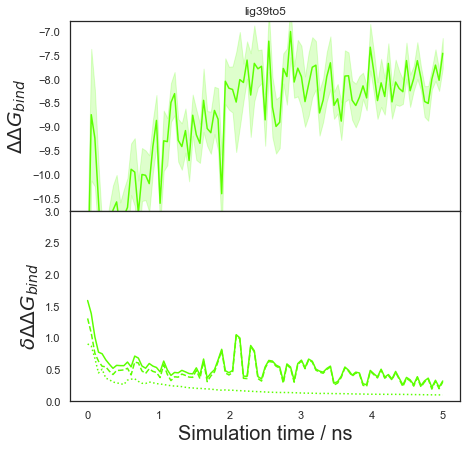

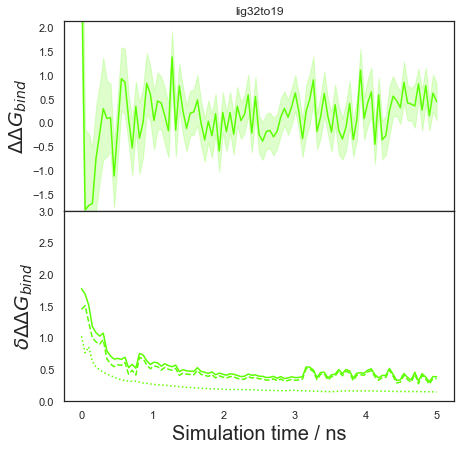

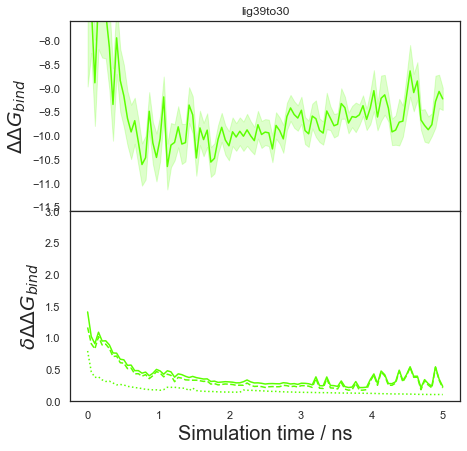

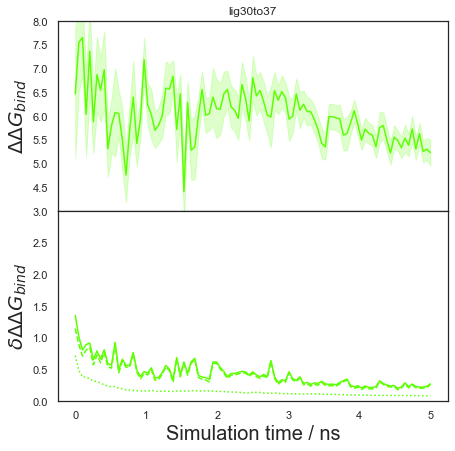

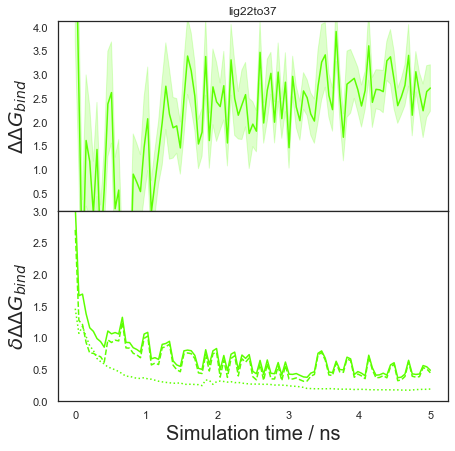

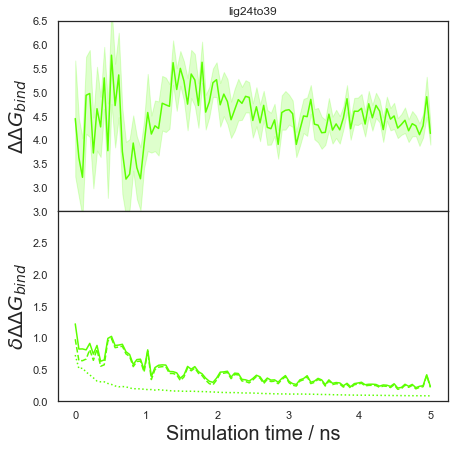

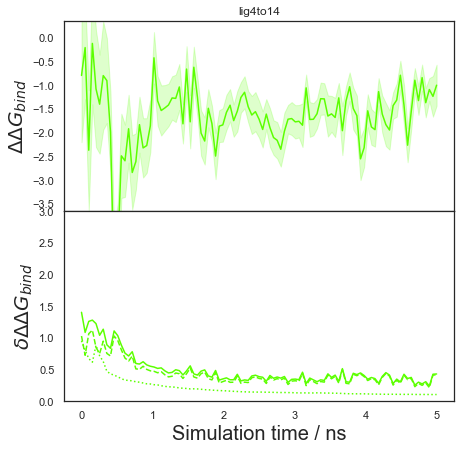

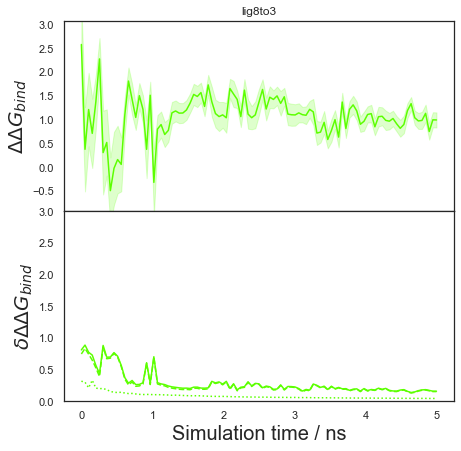

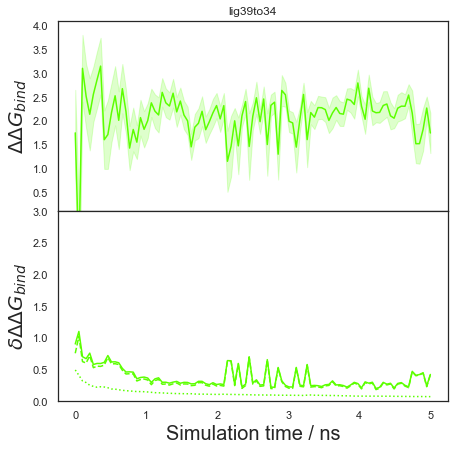

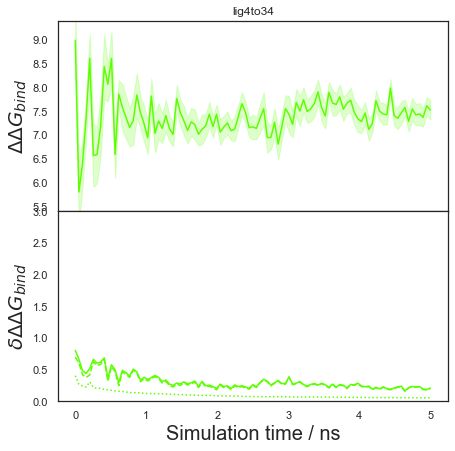

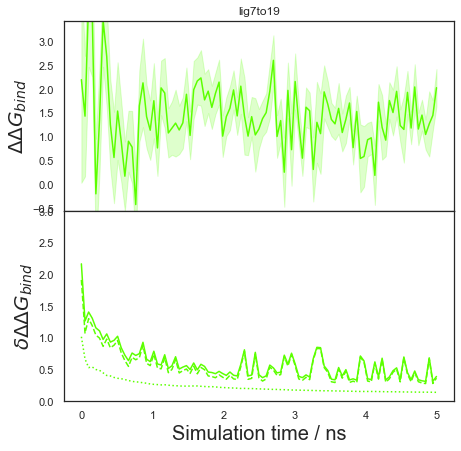

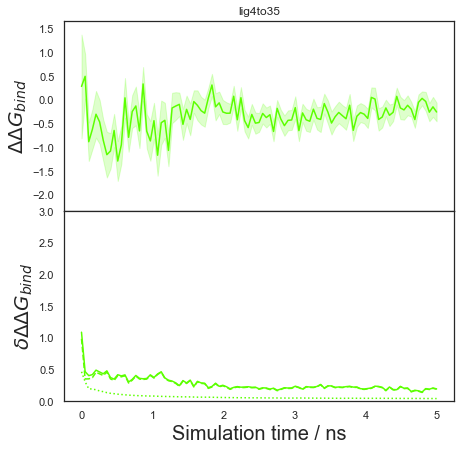

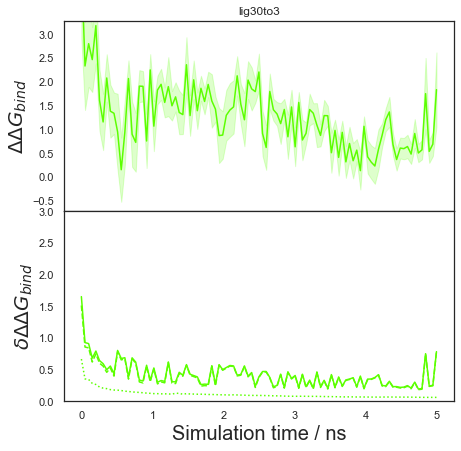

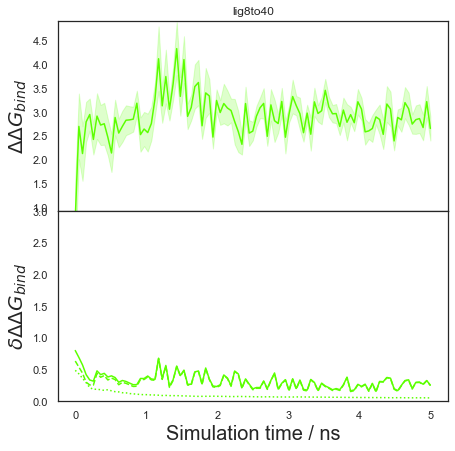

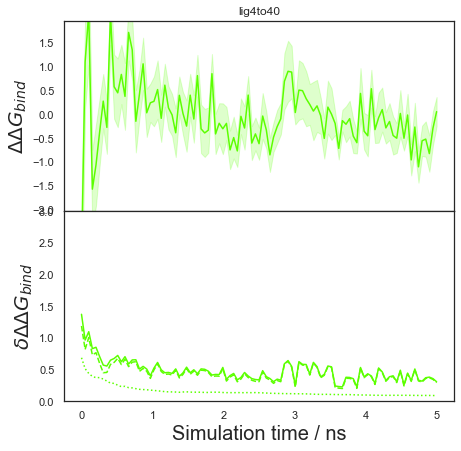

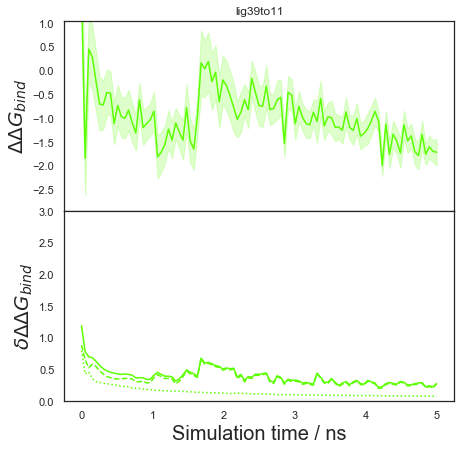

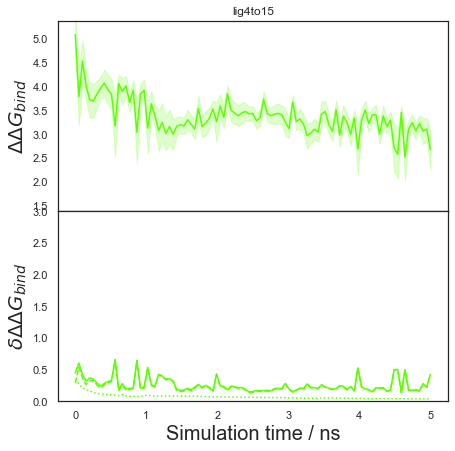

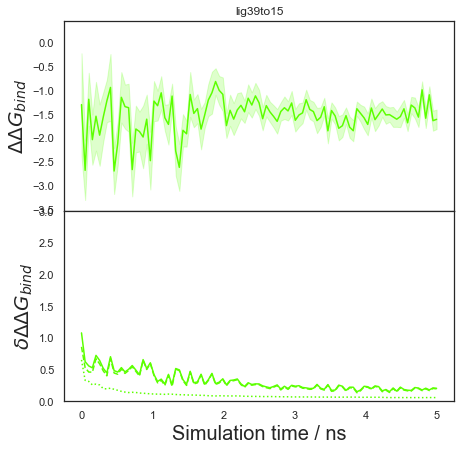

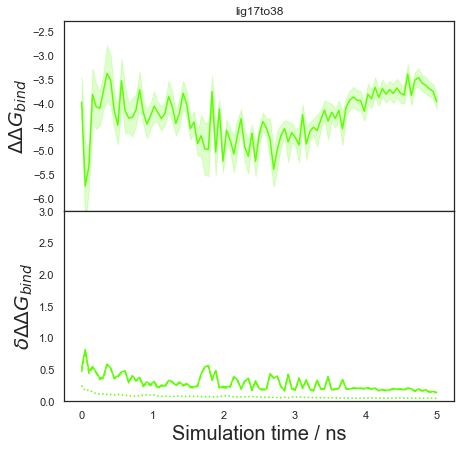

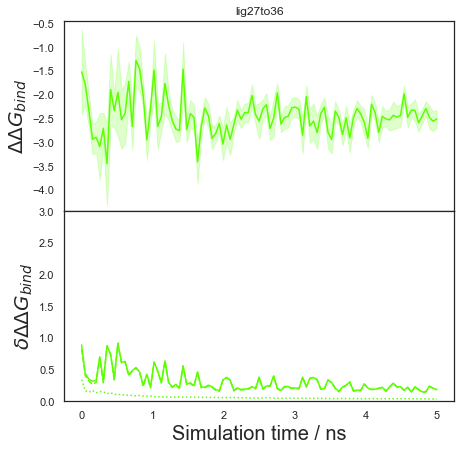

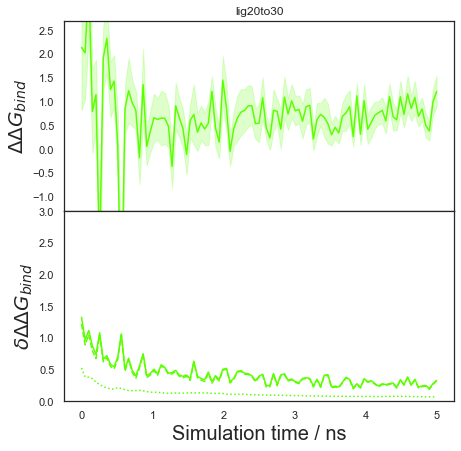

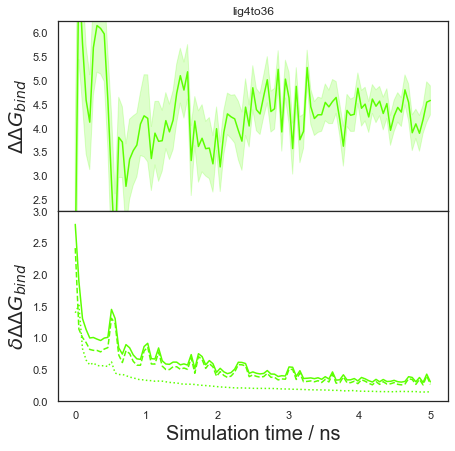

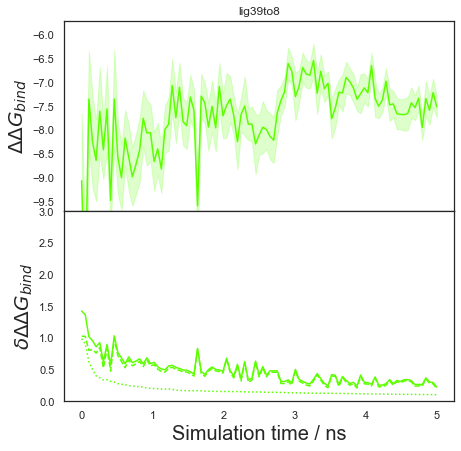

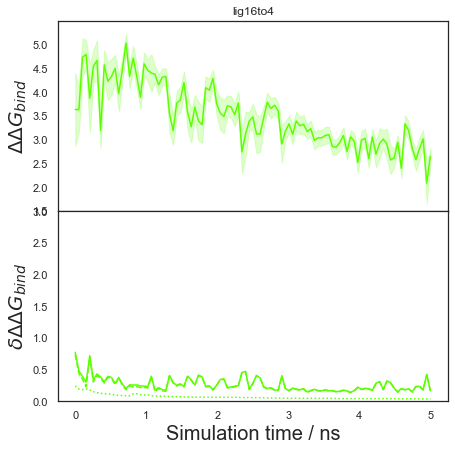

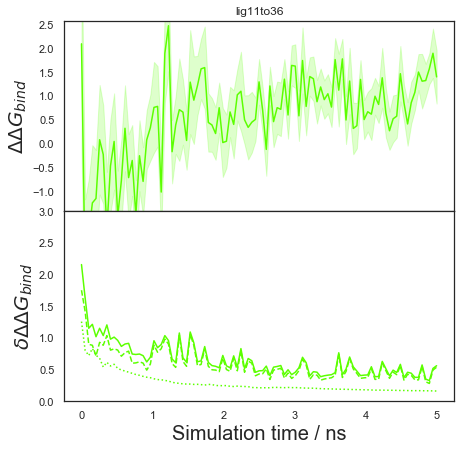

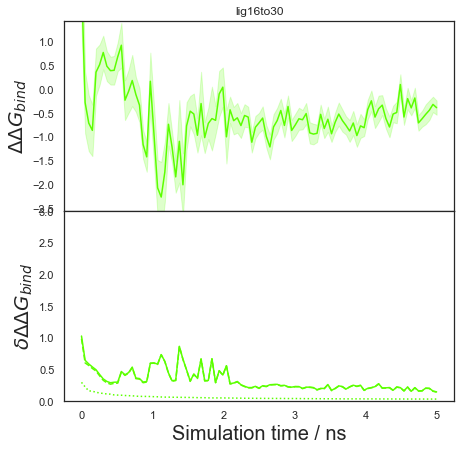

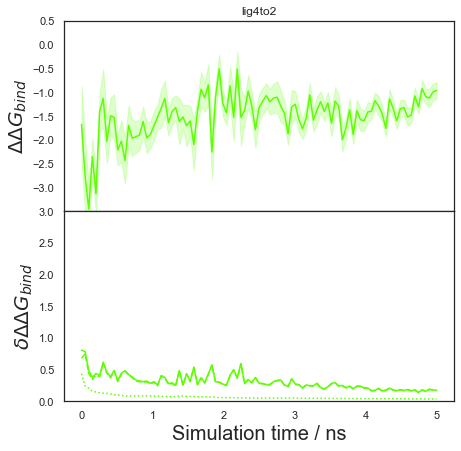

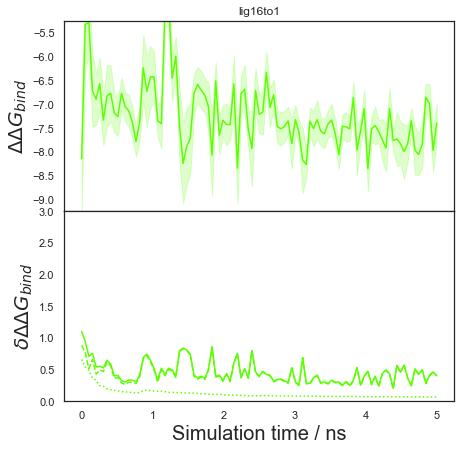

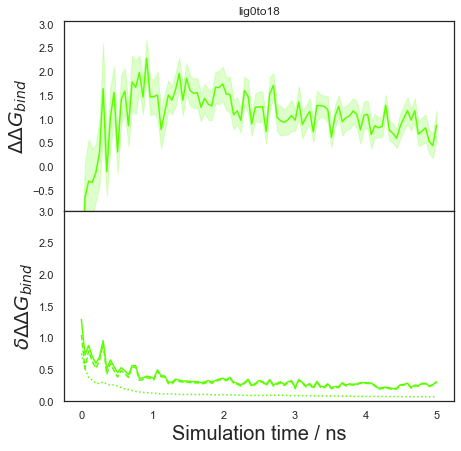

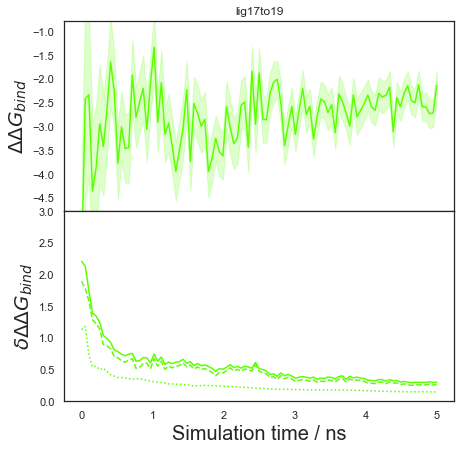

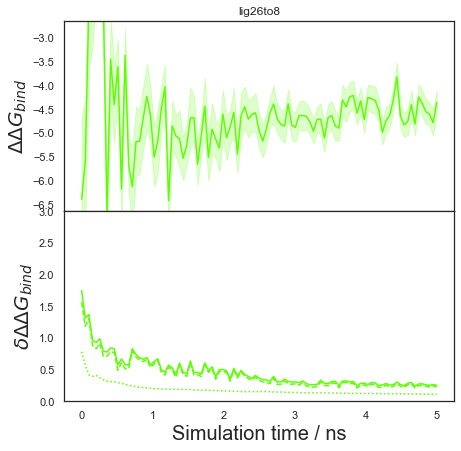

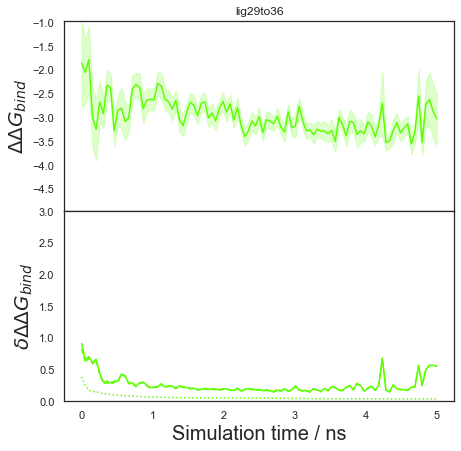

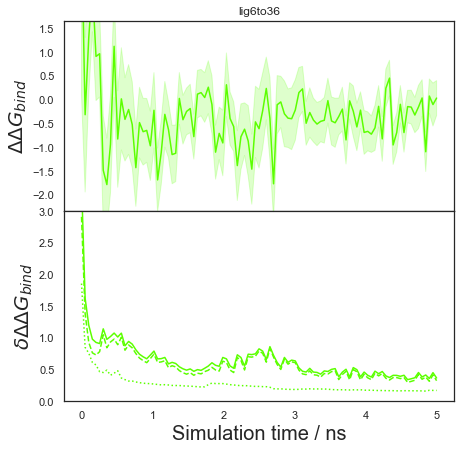

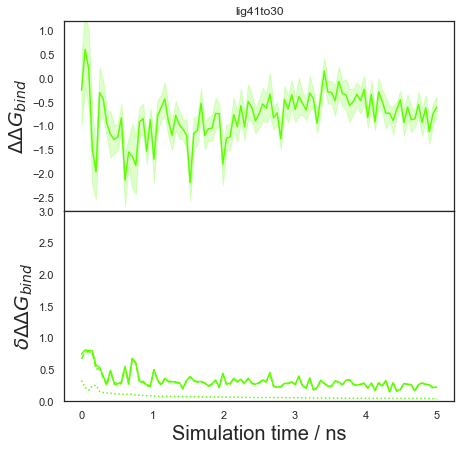

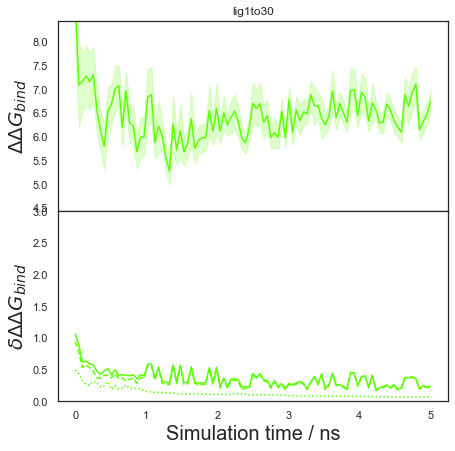

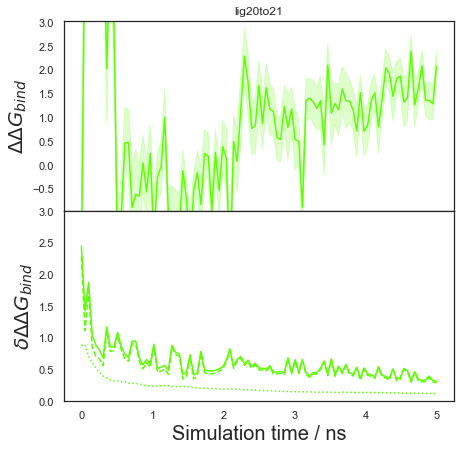

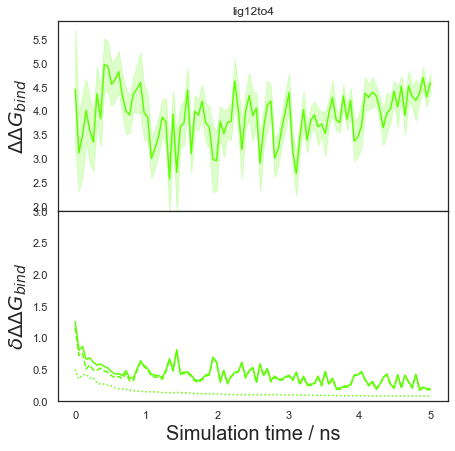

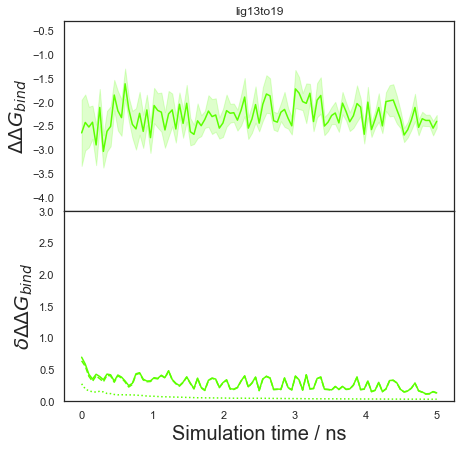

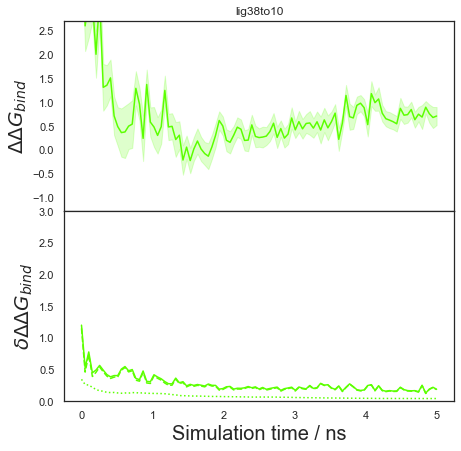

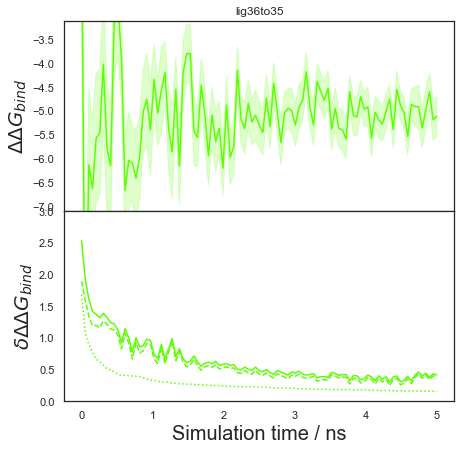

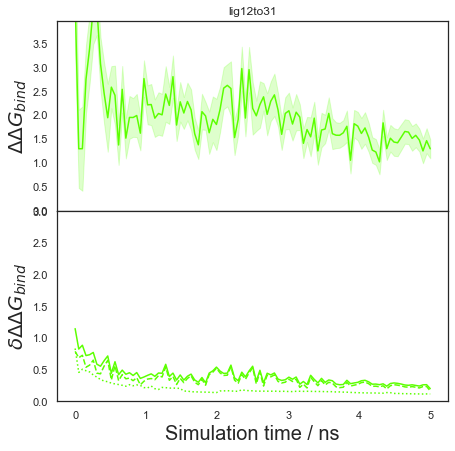

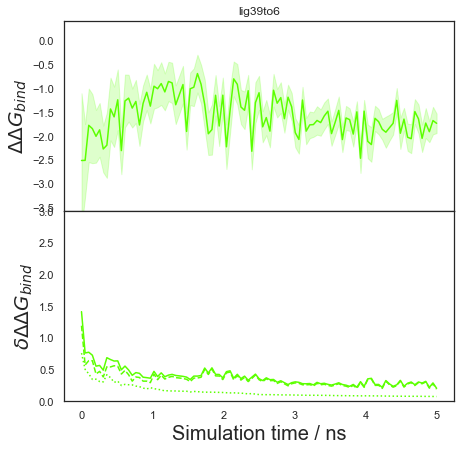

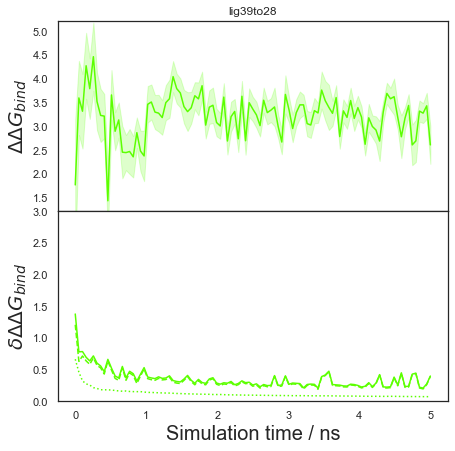

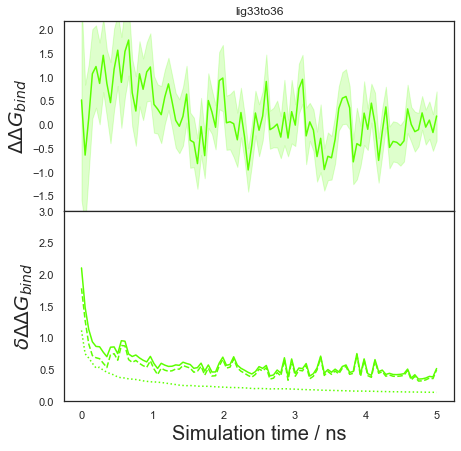

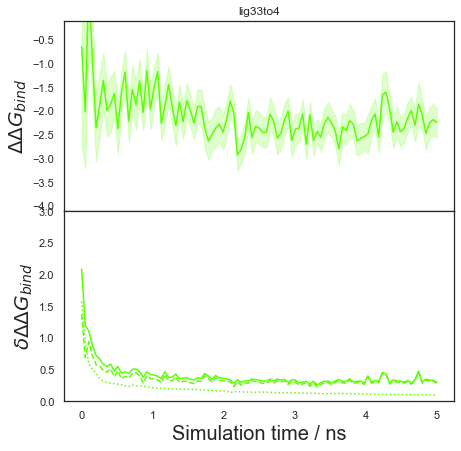

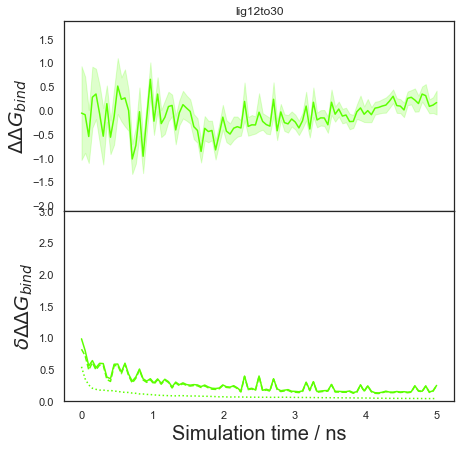

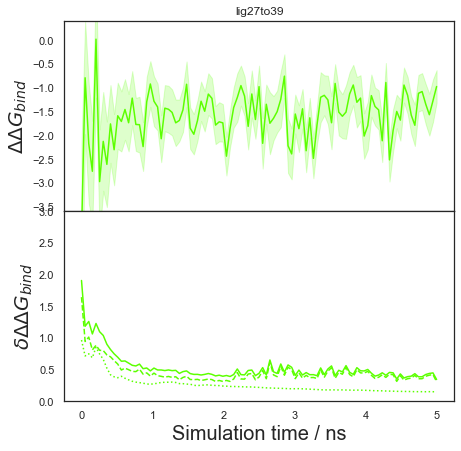

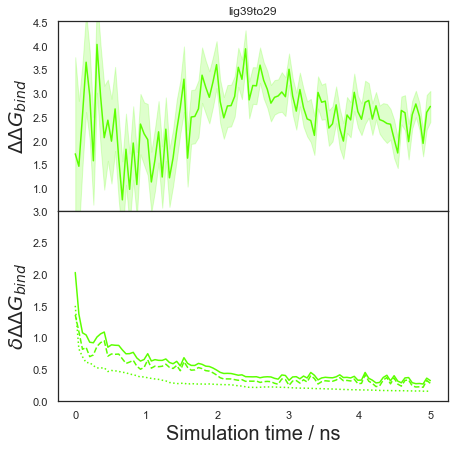

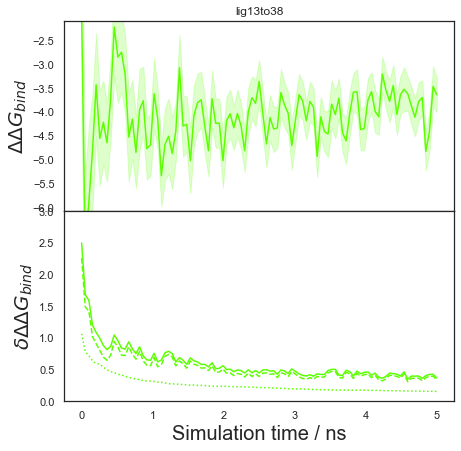

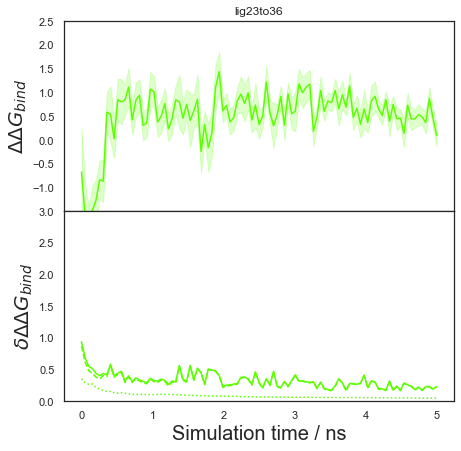

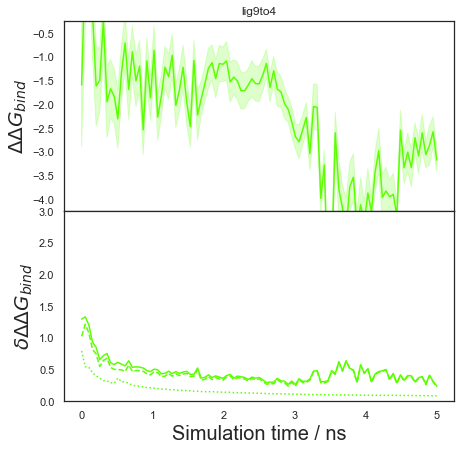

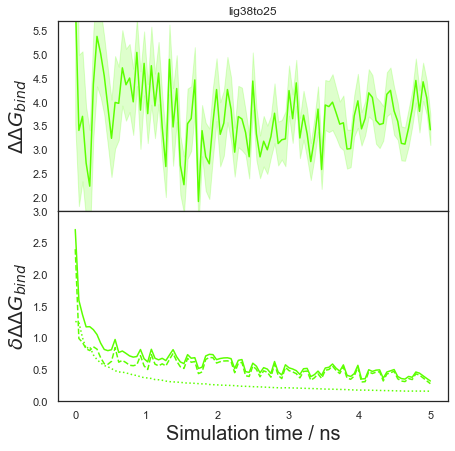

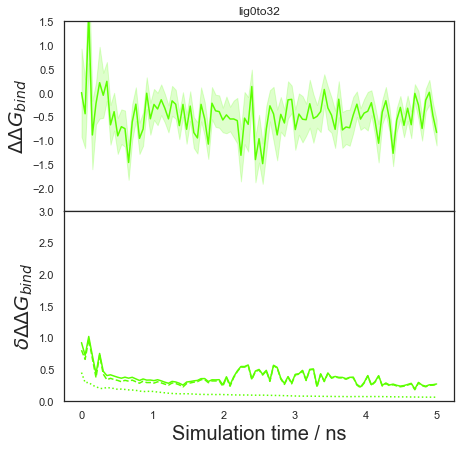

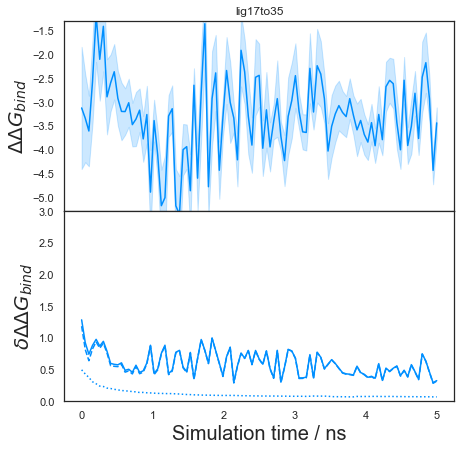

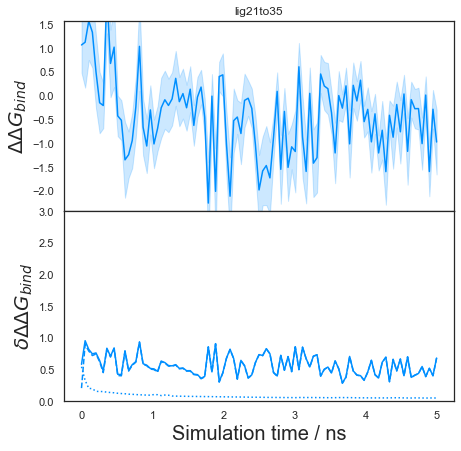

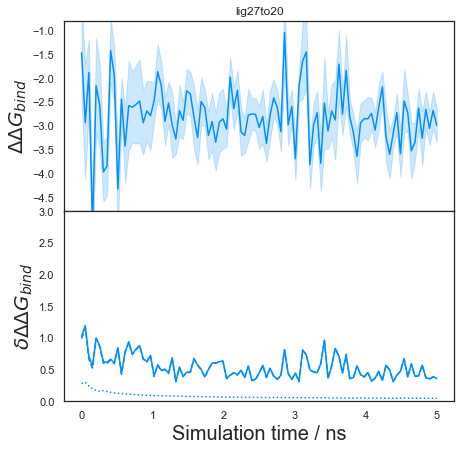

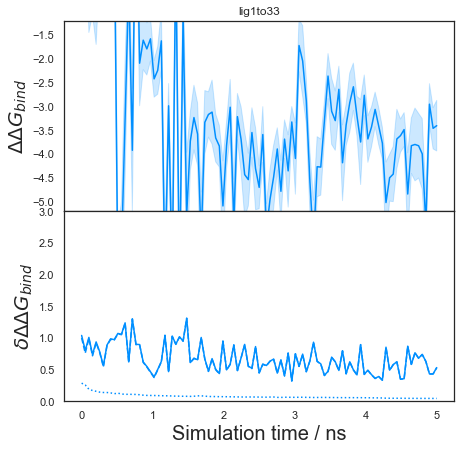

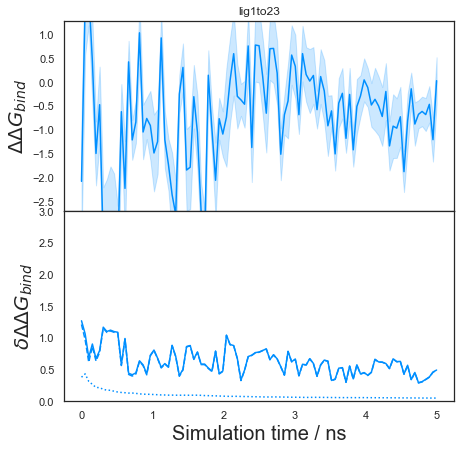

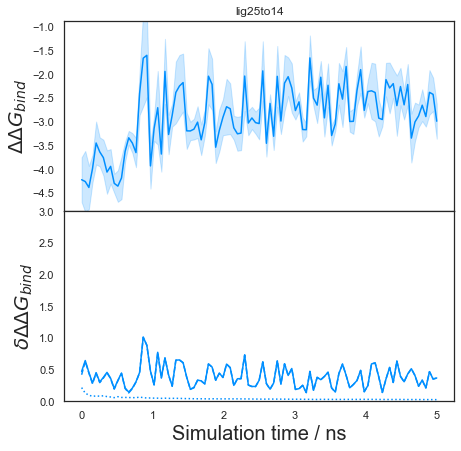

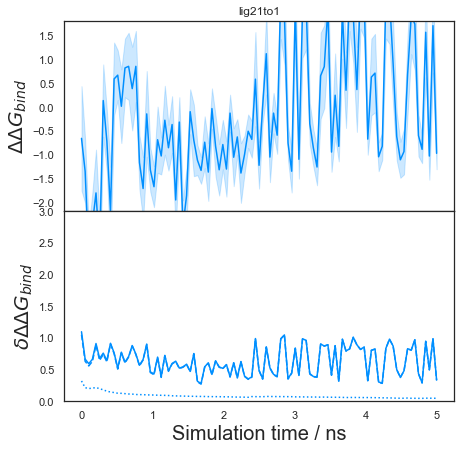

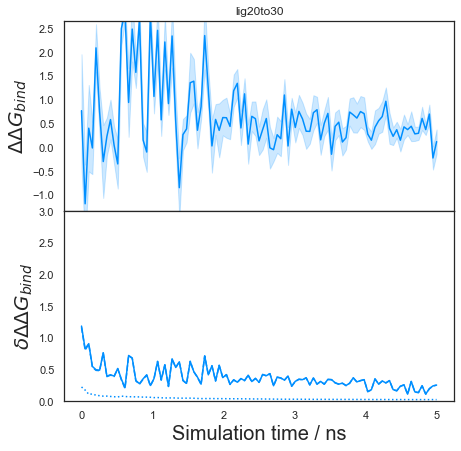

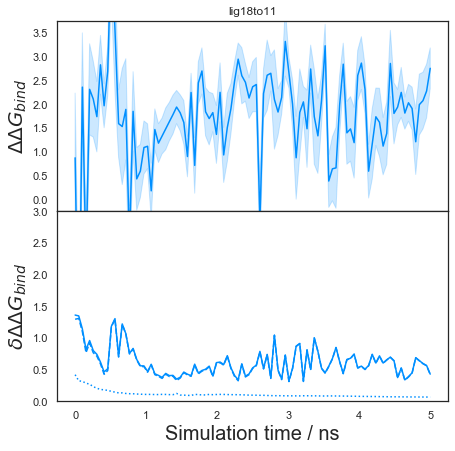

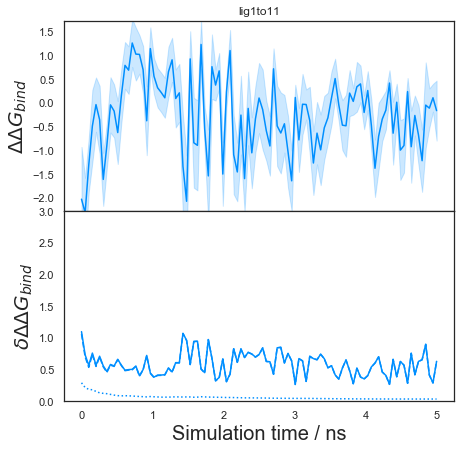

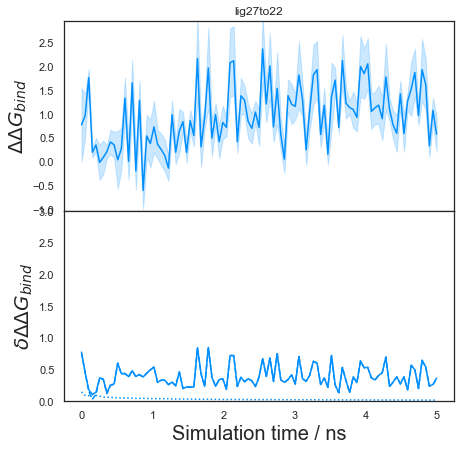

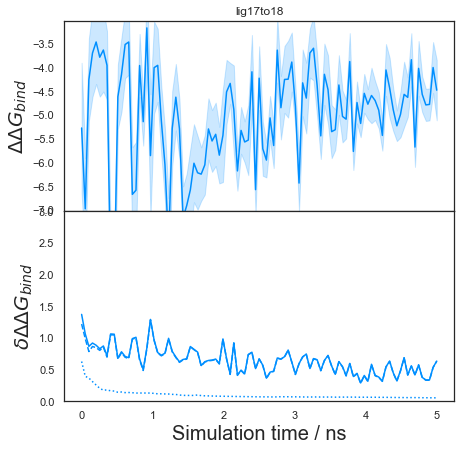

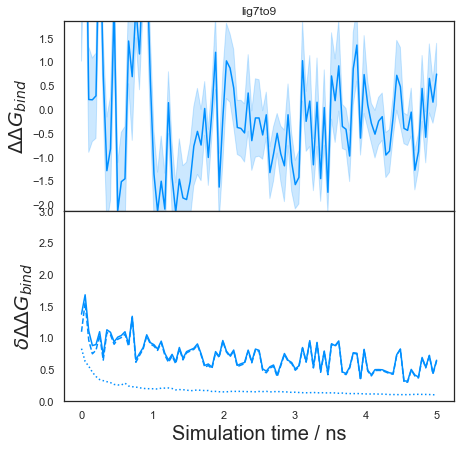

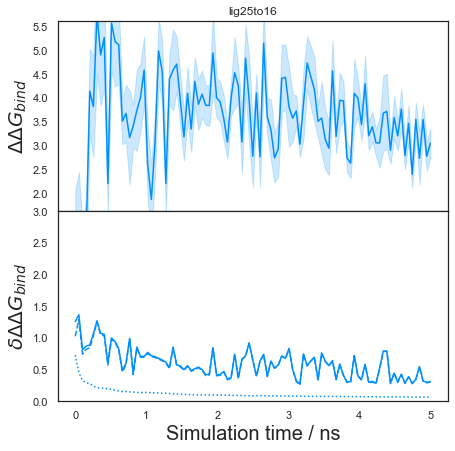

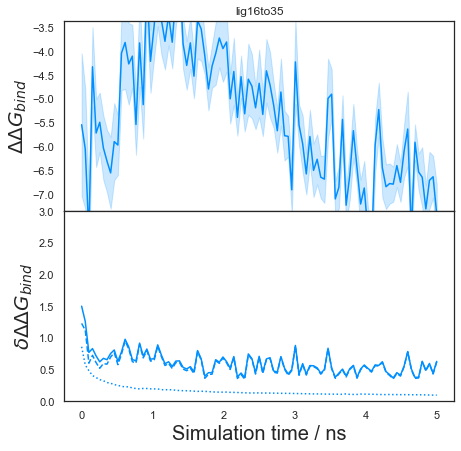

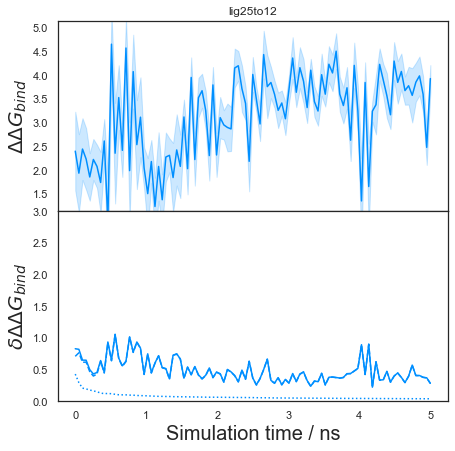

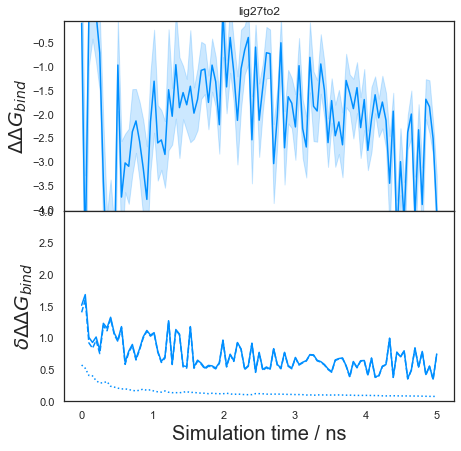

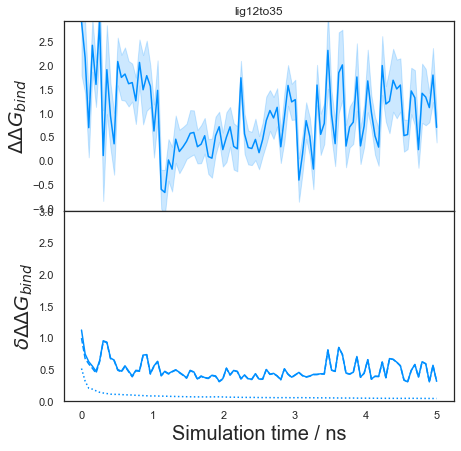

In [4]:
# sns.set_style('white')
for _,target in targets.items():
    for sim in target.all_sims:
        if len(sim.vacdg_history) == 0:
            continue
        f, (fe_fig, err_fig) = plt.subplots(2,1, sharex=True,figsize=(7,7))
        plt.subplots_adjust(hspace=0.0)
        fe_fig.set_title(f'{sim.directory}')

        bfe_history = np.asarray(sim.soldg_history) - np.asarray(sim.comdg_history)
        error_history = ((np.asarray(sim.solddg_history))**2 + (np.asarray(sim.comddg_history))**2)**0.5

        xaxis = np.linspace(0.,5.,len(bfe_history))

        fe_fig.plot(xaxis,bfe_history,color=target.color)
        fe_fig.fill_between(xaxis,bfe_history - error_history, bfe_history + error_history, alpha = 0.2,color=target.color)
        err_fig.plot(xaxis,error_history,color=target.color)
        err_fig.plot(xaxis,sim.solddg_history,color=target.color,linestyle='dotted',label='solvent')
        err_fig.plot(xaxis,sim.comddg_history,color=target.color,linestyle='dashed',label='complex')

        err_fig.set_ylabel(r'$\delta \Delta \Delta G_{bind}$',fontsize=20)
        fe_fig.set_ylabel(r'$\Delta \Delta G_{bind}$',fontsize=20)
        plt.xlabel('Simulation time / ns',fontsize=20)
        mean = np.mean(bfe_history)
        fe_fig.set_ylim(mean-2.,mean+2.)
        err_fig.set_ylim(0.,3.)
        plt.show()

In [5]:
data = []

for _,target in targets.items():
    for sim in target.all_sims:
        try:
            var = ((np.asarray(sim.solddg))**2 + (np.asarray(sim.comddg))**2)**0.5
            eff = -np.log10(var)
            data.append([target.name,eff])
        except TypeError:
            print(f'error with {target.name}, {sim.directory}')
            continue

error with mcl1, lig16to21


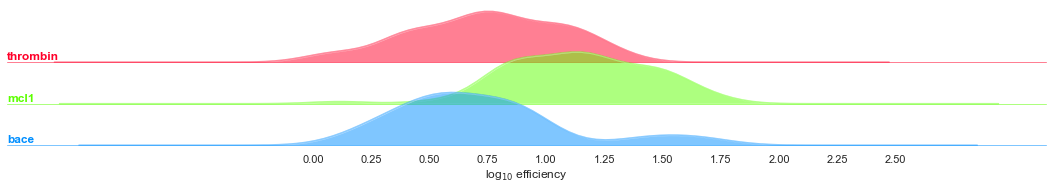

In [7]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# m = df.g.map(ord)

df = pd.DataFrame(data, columns = ['g', r'log$_{10}$ efficiency']) 
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = [list(target.color) for _, target in targets.items()]
# pal = plt.cm.get_cmap('gist_rainbow')  
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=1., palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, r'log$_{10}$ efficiency', clip_on=False, shade=True, alpha=0.5, lw=1.5, bw=.4)
g.map(sns.kdeplot, r'log$_{10}$ efficiency', clip_on=False, color="w", lw=0.1, bw=.4)
g.map(plt.axhline, y=0, lw=1, alpha=0.5, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    color = targets[label].color
    ax = plt.gca()
    ax.text(0, 0.1, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, r'log$_{10}$ efficiency')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xticks=list(np.linspace(0.,2.5,11)))
# g.set(xlabel='efficiency')
g.despine(bottom=True, left=True)
plt.show()